# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [12]:
import pandas as pd

In [13]:
from _conf import EXTENDED_BASELINE_DATA, PREPROCESSDED_RESULTS

samplns_data = pd.read_json(PREPROCESSDED_RESULTS)
baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
from _conf import EXTENDED_BASELINE_DATA

extended_baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
extended_baseline_data = pd.concat([baseline_data, extended_baseline_data])
baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample,archive_path
0,calculate,9,15,ACTS-IPOG-FT,t2,1620,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
1,lcm,9,16,ACTS-IPOG-FT,t2,485,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
2,email,10,17,ACTS-IPOG-FT,t2,514,8.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
3,ChatClient,14,20,ACTS-IPOG-FT,t2,538,10.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
4,toybox_2006-10-31_23-30-06,16,13,ACTS-IPOG-FT,t2,485,13.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
...,...,...,...,...,...,...,...,...,...
1945,freetz,31012,102705,FIDE-YASA,t2_m10_null,900009,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1946,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1947,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1948,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip


In [14]:
extended_baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample,archive_path
0,calculate,9,15,ACTS-IPOG-FT,t2,1620,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
1,lcm,9,16,ACTS-IPOG-FT,t2,485,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
2,email,10,17,ACTS-IPOG-FT,t2,514,8.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
3,ChatClient,14,20,ACTS-IPOG-FT,t2,538,10.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
4,toybox_2006-10-31_23-30-06,16,13,ACTS-IPOG-FT,t2,485,13.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
...,...,...,...,...,...,...,...,...,...
1945,freetz,31012,102705,FIDE-YASA,t2_m10_null,900009,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1946,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1947,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1948,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip


In [15]:
samplns_data

,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime_baseline,baseline_sample_size,path_to_baseline_sample,archive_path,parameters,instance_name,lower_bound,upper_bound,iteration_info,time_used_by_yasa,timelimit_for_samplns,samplns_used,runtime_samplns,time_limit
0,14,20,FIDE-YASA,t2_m1_null,205,10,2023-03-01_13-51-03/4_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",ChatClient,7,7,"[{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...",0.205,10799.795,True,8.636926,10800
1,52,109,FIDE-YASA,t2_m1_null,289,13,2023-03-01_13-51-03/16_1_3_5_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",PPU,12,12,"[{'nbrhd_tuples': 164, 'nbrhd_confs': 7, 'iter...",0.289,10799.711,True,6.240633,10800
2,16,33,FIDE-YASA,t2_m1_null,155,6,2023-03-01_13-51-03/6_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",car,5,5,"[{'nbrhd_tuples': 77, 'nbrhd_confs': 6, 'itera...",0.155,10799.845,True,0.062622,10800
3,16,33,FIDE-YASA,t2_m1_null,174,6,2023-03-01_13-51-03/6_1_3_2_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",car,5,5,"[{'nbrhd_tuples': 77, 'nbrhd_confs': 6, 'itera...",0.174,10799.826,True,0.043420,10800
4,1408,3319,FIDE-YASA,t2_m1_null,4993,77,2023-03-01_13-51-03/47_1_3_3_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",ea2468,31,39,"[{'nbrhd_tuples': 178, 'nbrhd_confs': 6, 'iter...",4.993,10795.007,True,10938.016142,10800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,557,4992,FIDE-YASA,t2_m1_null,2070,400,2023-03-01_13-51-03/33_1_3_3_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",fs_2017-05-22,396,396,"[{'nbrhd_tuples': 0, 'nbrhd_confs': 0, 'iterat...",2.070,10797.930,True,433.986984,10800
226,1018,997,FIDE-YASA,t2_m1_null,4184,44,2023-03-01_13-51-03/37_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",busybox-1_29_2,18,22,"[{'nbrhd_tuples': 228, 'nbrhd_confs': 4, 'iter...",4.184,10795.816,True,10859.846727,10800
227,76,147,FIDE-YASA,t2_m1_null,337,21,2023-03-01_13-51-03/17_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",berkeleyDB1,15,15,"[{'nbrhd_tuples': 204, 'nbrhd_confs': 10, 'ite...",0.337,10799.663,True,559.524486,10800
228,23,35,FIDE-YASA,t2_m1_null,300,11,2023-03-01_13-51-03/9_1_3_5_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",APL,7,7,"[{'nbrhd_tuples': 207, 'nbrhd_confs': 10, 'ite...",0.300,10799.700,True,8.174069,10800


In [16]:
baseline_data = extended_baseline_data

In [17]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)

In [18]:
best_upper_bound = (
    samplns_data.groupby(["instance_name"])["upper_bound"]
    .max()
    .reset_index()
    .rename(columns={"upper_bound": "best_upper_bound"})
)

In [19]:
best_bounds = pd.merge(best_lower_bound, best_upper_bound, on="instance_name")
from _conf import EXPORT_BEST_BOUNDS

best_bounds.to_csv(EXPORT_BEST_BOUNDS)
best_bounds

,instance_name,best_lower_bound,best_upper_bound
0,APL,7,7
1,APL-Model,8,8
2,BankingSoftware,29,29
3,BattleofTanks,256,314
4,ChatClient,7,7
5,DMIE,16,16
6,E-Shop,9,12
7,EMBToolkit,1872,1872
8,FameDB,8,8
9,FeatureIDE,7,8


In [20]:
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,29,29.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,10,9.0
7,EMBToolkit,1872,1872.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [21]:
samplns_data = samplns_data[["instance_name", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
samplns_data["gap"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_lower_bound"] - 1
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data

,instance_name,upper_bound,best_lower_bound,internal_best,gap,algorithm_name
0,ChatClient,7,7,7.0,0.0,SampLNS
1,ChatClient,7,7,7.0,0.0,SampLNS
2,ChatClient,7,7,7.0,0.0,SampLNS
3,ChatClient,7,7,7.0,0.0,SampLNS
4,ChatClient,7,7,7.0,0.0,SampLNS
...,...,...,...,...,...,...
225,berkeleyDB1,15,15,15.0,0.0,SampLNS
226,berkeleyDB1,15,15,15.0,0.0,SampLNS
227,berkeleyDB1,15,15,15.0,0.0,SampLNS
228,berkeleyDB1,15,15,15.0,0.0,SampLNS


In [22]:
baseline_data = baseline_data[
    ["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]
]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")
baseline_data["gap"] = 100 * (
    (baseline_data["sample_size"] / baseline_data["best_lower_bound"]) - 1
)


def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]


baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
# baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,internal_best,gap,algorithm_name
0,calculate,9.0,ACTS-IPOG-FT,t2,5,5.0,80.000,ACTS-IPOG-FT
1,calculate,9.0,ACTS-IPOG-CSP,t2,5,5.0,80.000,ACTS-IPOG-CSP
2,calculate,10.0,ACTS-IPOF-FT,t2,5,5.0,100.000,ACTS-IPOF-FT
3,calculate,10.0,ACTS-IPOF-CSP,t2,5,5.0,100.000,ACTS-IPOF-CSP
4,calculate,9.0,FIDE-ICPL,t2,5,5.0,80.000,FIDE-ICPL
...,...,...,...,...,...,...,...,...
3583,ea2468,67.0,FIDE-YASA,t2_m10_null,32,32.0,109.375,FIDE-YASA(m=10)
3584,ea2468,67.0,FIDE-YASA,t2_m10_null,32,32.0,109.375,FIDE-YASA(m=10)
3585,ea2468,67.0,FIDE-YASA,t2_m10_null,32,32.0,109.375,FIDE-YASA(m=10)
3586,ea2468,67.0,FIDE-YASA,t2_m10_null,32,32.0,109.375,FIDE-YASA(m=10)


In [23]:
gaps = pd.concat(
    [
        samplns_data[["algorithm_name", "instance_name", "gap"]],
        baseline_data[["algorithm_name", "instance_name", "gap"]],
    ]
)
gaps

,algorithm_name,instance_name,gap
0,SampLNS,ChatClient,0.000
1,SampLNS,ChatClient,0.000
2,SampLNS,ChatClient,0.000
3,SampLNS,ChatClient,0.000
4,SampLNS,ChatClient,0.000
...,...,...,...
3583,FIDE-YASA(m=10),ea2468,109.375
3584,FIDE-YASA(m=10),ea2468,109.375
3585,FIDE-YASA(m=10),ea2468,109.375
3586,FIDE-YASA(m=10),ea2468,109.375


In [24]:
gaps["algorithm_name"].unique().tolist()

['SampLNS',
 'ACTS-IPOG-FT',
 'ACTS-IPOG-CSP',
 'ACTS-IPOF-FT',
 'ACTS-IPOF-CSP',
 'FIDE-ICPL',
 'FIDE-Chvatal',
 'Incling',
 'FIDE-YASA(m=1)',
 'FIDE-YASA(m=3)',
 'FIDE-YASA(m=5)',
 'FIDE-YASA(m=10)']

In [25]:
algorithm_selection = [
    "SampLNS",
    "FIDE-ICPL",
    "FIDE-Chvatal",
    "Incling",
    "FIDE-YASA(m=1)",
    "FIDE-YASA(m=3)",
    "FIDE-YASA(m=5)",
    "FIDE-YASA(m=10)",
    "ACTS-IPOG-FT",
    "ACTS-IPOG-CSP",
    "ACTS-IPOF-FT",
    "ACTS-IPOF-CSP",
]
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t.dropna(inplace=True)
t = t.groupby("instance_name")[["algorithm_name"]].nunique()
instances_solved_by_all = t[
    t["algorithm_name"] == len(algorithm_selection)
].index.tolist()
instances_solved_by_all

['APL',
 'APL-Model',
 'ChatClient',
 'FameDB',
 'FeatureIDE',
 'SortingLine',
 'TightVNC',
 'Violet',
 'axTLS',
 'busybox_2007-01-24_09-14-09',
 'busybox_2020-12-16_21-53-05',
 'calculate',
 'car',
 'dell',
 'email',
 'gpl',
 'lcm',
 'soletta_2015-06-26_18-38-56',
 'toybox_2006-10-31_23-30-06',
 'toybox_2020-12-06_00-02-46']

In [26]:
print(len(instances_solved_by_all), "instances solved by all")

20 instances solved by all


In [27]:
t = gaps[gaps["instance_name"].isin(instances_solved_by_all)].copy()
t["Instances"] = f"Common subset [{len(instances_solved_by_all)}]"
gaps["Instances"] = "Ignore unsolved"
gaps = pd.concat([gaps, t], ignore_index=True)
gaps

,algorithm_name,instance_name,gap,Instances
0,SampLNS,ChatClient,0.000000,Ignore unsolved
1,SampLNS,ChatClient,0.000000,Ignore unsolved
2,SampLNS,ChatClient,0.000000,Ignore unsolved
3,SampLNS,ChatClient,0.000000,Ignore unsolved
4,SampLNS,ChatClient,0.000000,Ignore unsolved
...,...,...,...,...
5473,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]
5474,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]
5475,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]
5476,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]


In [28]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"] = 1
gaps.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP,70.965433
ACTS-IPOF-FT,73.889668
ACTS-IPOG-CSP,77.726015
ACTS-IPOG-FT,80.577351
FIDE-Chvatal,87.097882
FIDE-ICPL,87.517606
FIDE-YASA(m=1),67.897656
FIDE-YASA(m=10),48.730177
FIDE-YASA(m=3),53.787146


In [29]:
num_instances_solved_by_alg = (
    gaps.dropna().groupby("algorithm_name")["instance_name"].nunique().to_dict()
)
num_instances_solved_by_alg

{'ACTS-IPOF-CSP': 21,
 'ACTS-IPOF-FT': 23,
 'ACTS-IPOG-CSP': 22,
 'ACTS-IPOG-FT': 23,
 'FIDE-Chvatal': 37,
 'FIDE-ICPL': 45,
 'FIDE-YASA(m=1)': 46,
 'FIDE-YASA(m=10)': 46,
 'FIDE-YASA(m=3)': 46,
 'FIDE-YASA(m=5)': 46,
 'Incling': 45,
 'SampLNS': 46}

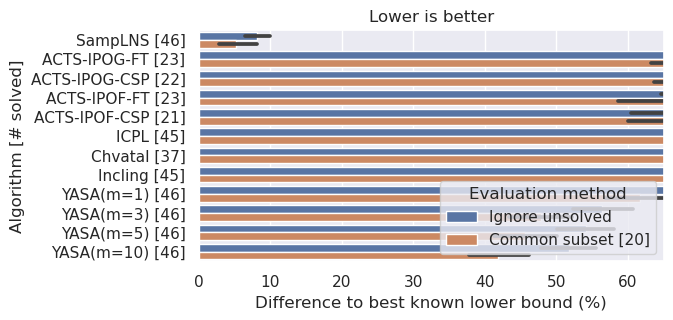

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()

f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Instances")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()

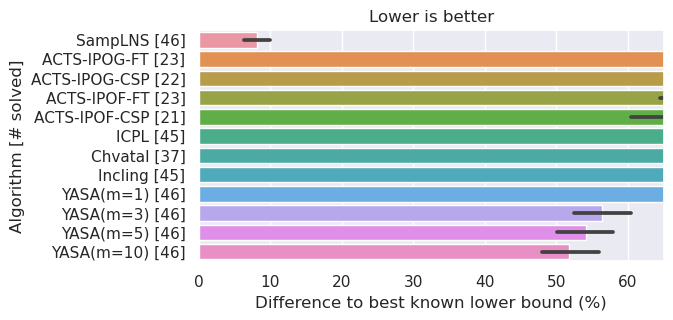

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"] == "Ignore unsolved"]
f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()